## **Описание задачи**
Датасет включает в себя набор данных об образцах белого и красного вина Vinho Verde с севера Португалии. Задача заключается в предсказывании качества вина основываясь на его физико-химических характеристиках.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/AdelineSommers/MachineLearning/main/lab1/wineQuality.csv"
data = pd.read_csv(url)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


*   **type** - тип вина (белое или красное)
*   **fixed acidity** - фиксированная кислотность
*   **volatile acidity** - летучая кислотность
*   **citric acid** - лимонная кислота
*   **residual sugar** - остаточный сахар
*   **chlorides** - хлориды
*   **free sulfur dioxide** - свободный диоксид серы
*   **total sulfur dioxide** - суммарный диоксид серы
*   **density** - плотность
*   **pH** - описывает, насколько кислым или щелочным является вино по шкале от 0 (очень кислое) до 14 (очень щелочное); большинство вин имеют показатель рН от 3 до 4 по шкале pH.
*   **sulphates** - сульфаты
*   **alcohol** - процент содержания спирта
*   **quality** - качество (от 0 до 10)



## **Анализ данных**
Посмотрим на сбалансированность классов.

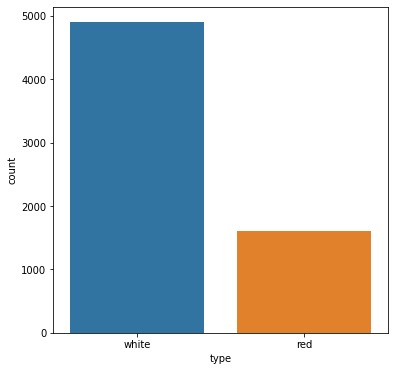

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['type'])
pass

Из графика видно, что белые вина сильно преобладают.

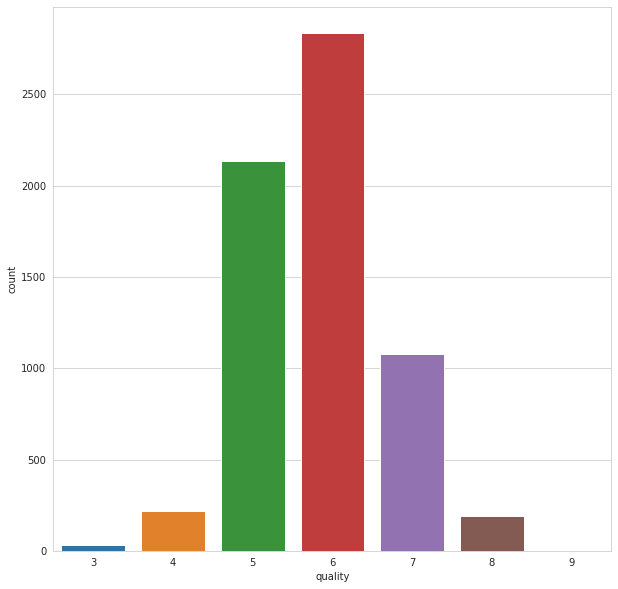

In [ ]:
plt.figure(figsize =(10, 10))
sns.set_style("whitegrid")
sns.countplot(x = data['quality'])

Можно заметить, что преобладает вино среднего качества. Это говорит о несбалансированности классов.
Прежде чем далее рассматривать и анализировать зависимости признаков необходимо избавиться от небольших выбросов. Для этого удаляем значения выходящие за пределы квантилей уровней 0,005 и 0,995.

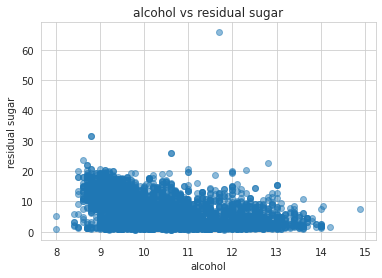

In [ ]:
plt.plot(data['alcohol'], data['residual sugar'], 'o', alpha = 0.5)
plt.xlabel('alcohol')
plt.ylabel('residual sugar')
plt.title('alcohol vs residual sugar')
pass

До удаления выбросов.

In [ ]:
out_of_range = data[
    (data['fixed acidity'] < data['fixed acidity'].quantile(0.005)) | (data['fixed acidity'] > data['fixed acidity'].quantile(0.995)) | 
    (data['volatile acidity'] < data['volatile acidity'].quantile(0.005)) | (data['volatile acidity'] > data['volatile acidity'].quantile(0.995)) |
    (data['citric acid'] < data['citric acid'].quantile(0.005)) | (data['citric acid'] > data['citric acid'].quantile(0.995)) | 
    (data['residual sugar'] < data['residual sugar'].quantile(0.005)) | (data['residual sugar'] > data['residual sugar'].quantile(0.995)) | 
    (data['chlorides'] < data['chlorides'].quantile(0.005)) | (data['chlorides'] > data['chlorides'].quantile(0.995)) | 
    (data['free sulfur dioxide'] < data['free sulfur dioxide'].quantile(0.005)) | (data['free sulfur dioxide'] > data['free sulfur dioxide'].quantile(0.995)) | 
    (data['total sulfur dioxide'] < data['total sulfur dioxide'].quantile(0.005)) | (data['total sulfur dioxide'] > data['total sulfur dioxide'].quantile(0.995)) | 
    (data['density'] < data['density'].quantile(0.005)) | (data['density'] > data['density'].quantile(0.995)) | 
    (data['pH'] < data['pH'].quantile(0.005)) | (data['pH'] > data['pH'].quantile(0.995)) | 
    (data['sulphates'] < data['sulphates'].quantile(0.005)) | (data['sulphates'] > data['sulphates'].quantile(0.995)) |
    (data['alcohol'] < data['alcohol'].quantile(0.005)) | (data['alcohol'] > data['alcohol'].quantile(0.995))].index
data = data.drop(out_of_range)
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6000.000000,6003.000000,6007.000000,6008.000000,6008.000000,6010.000000,6010.000000,6010.000000,6001.000000,6006.000000,6010.000000,6010.000000
mean,7.193642,0.335757,0.315597,5.419724,0.054350,30.356572,116.067304,0.994671,3.218882,0.526980,10.467870,5.822463
std,1.185265,0.155858,0.137633,4.590567,0.025698,16.554108,55.073220,0.002835,0.152830,0.132887,1.152919,0.857996
min,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988620,2.860000,0.280000,8.600000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.250000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,12.700000,0.965000,0.740000,19.400000,0.241000,86.000000,247.000000,1.001400,3.700000,1.120000,13.600000,9.000000


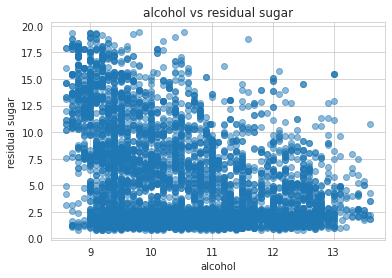

In [ ]:
plt.plot(data['alcohol'], data['residual sugar'], 'o', alpha = 0.5)
plt.xlabel('alcohol')
plt.ylabel('residual sugar')
plt.title('alcohol vs residual sugar')
pass

После удаления выбросов.

Теперь мы можем перейти к рассмотрению матрицы корреляции.

In [ ]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.231865,0.291109,-0.134532,0.343356,-0.288568,-0.336075,0.438595,-0.210296,0.298839,-0.070422,-0.073428
volatile acidity,0.231865,1.000000,-0.416406,-0.214773,0.447943,-0.366524,-0.431306,0.281614,0.277204,0.226324,-0.053859,-0.256079
citric acid,0.291109,-0.416406,1.000000,0.137599,-0.069129,0.164252,0.219622,0.053757,-0.310921,0.027945,0.014089,0.091881
residual sugar,-0.134532,-0.214773,0.137599,1.000000,-0.155507,0.443391,0.508931,0.538986,-0.274251,-0.191363,-0.374881,-0.037153
chlorides,0.343356,0.447943,-0.069129,-0.155507,1.000000,-0.227889,-0.332335,0.438037,0.137140,0.300458,-0.286862,-0.218966
free sulfur dioxide,-0.288568,-0.366524,0.164252,0.443391,-0.227889,1.000000,0.726196,0.046565,-0.168230,-0.190517,-0.187355,0.077734
total sulfur dioxide,-0.336075,-0.431306,0.219622,0.508931,-0.332335,0.726196,1.000000,0.032766,-0.260330,-0.295087,-0.272013,-0.035367
density,0.438595,0.281614,0.053757,0.538986,0.438037,0.046565,0.032766,1.000000,0.049780,0.257310,-0.708656,-0.310798
pH,-0.210296,0.277204,-0.310921,-0.274251,0.137140,-0.168230,-0.260330,0.049780,1.000000,0.256311,0.093749,0.011676
sulphates,0.298839,0.226324,0.027945,-0.191363,0.300458,-0.190517,-0.295087,0.257310,0.256311,1.000000,0.023414,0.056043


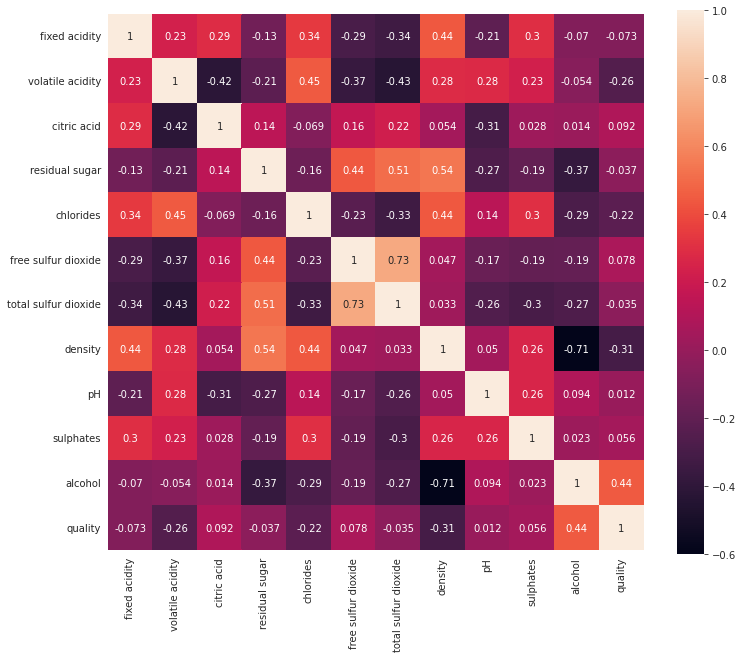

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), square = True, vmin= -0.6, annot = True)

Можно заметить, что заметная положительная корреляция наблюдается у признаков alcohol, citric acid, free sulfur dioxide и sulphates. 

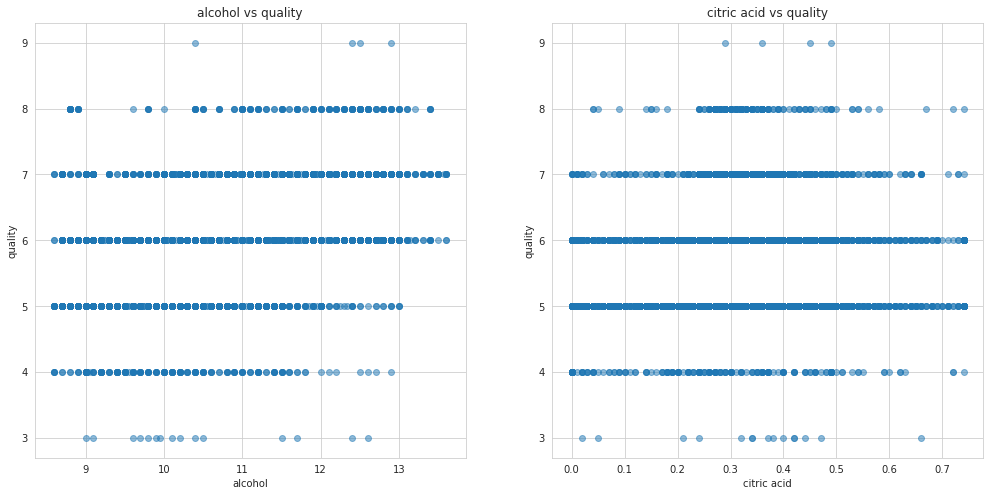

In [ ]:
plt.figure(figsize=(17,8))
plt.subplot(1, 2, 1)
plt.plot(data['alcohol'], data['quality'], 'o', alpha = 0.5)
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('alcohol vs quality')

plt.subplot(1, 2, 2)
plt.plot(data['citric acid'], data['quality'], 'o', alpha = 0.5)
plt.xlabel('citric acid')
plt.ylabel('quality')
plt.title('citric acid vs quality')
pass


У более качественных вин выше градус алкоголя.

Заметная отрицательная корреляция видна у признаков density, volatile acidity и chlorides.

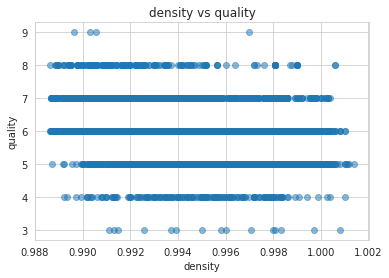

In [ ]:
plt.plot(data['density'], data['quality'], 'o', alpha = 0.5)
plt.xlabel('density')
plt.ylabel('quality')
plt.title('density vs quality')
pass


Чем меньше значение density, тем выше качество вина.

Также стоит обратить внимание на зависимость density и alcohol.  

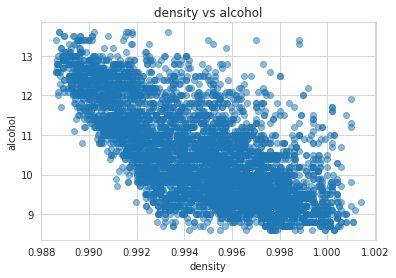

In [ ]:
plt.plot(data['density'], data['alcohol'], 'o', alpha = 0.5)
plt.xlabel('density')
plt.ylabel('alcohol')
plt.title('density vs alcohol')
pass

В винах с бóльшим градусом алкоголя меньше плотность и качество соответственно выше.

## **Подготовка данных**
Данный этап включает в себя: определение типа признаков, бинаризация номинальных признаков, заполнение пропущенных значений, стандартизация признаков.

Сначала обозначим признак 'type' как категориальный.

In [ ]:
data['type'] = data['type'].astype('category')
data['type'].dtype

CategoricalDtype(categories=['red', 'white'], ordered=False)

In [ ]:
data.describe(include=['category'])

,type
count,6010
unique,2
top,white
freq,4576


Признак 'type' является бинарным и для удобства принимаемые значения 'white' и 'red' заменим на '1' и '0' соответственно.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(data[['type']])

OneHotEncoder(drop='if_binary', sparse=False)

In [ ]:
add_col = pd.DataFrame(enc.transform(data[['type']]), 
                       columns=enc.get_feature_names_out(), index=data.index)
add_col.head()

,type_white
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


In [ ]:
add_col.tail()

,type_white
6492,0.0
6493,0.0
6494,0.0
6495,0.0
6496,0.0


Заменим изначальный столбец 'type' на новый бинарный вариант.

In [ ]:
data = pd.concat((data, add_col), axis=1).drop(['type'], axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1.0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0.0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.0


Проверим наличие пропущенных значений.

In [ ]:
data.isna().sum()  

fixed acidity           10
volatile acidity         7
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_white               0
dtype: int64

Так как некоторые значения отсутствуют их необходимо заполнить. Воспользуемся для этого медианой.

In [ ]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']])

SimpleImputer(strategy='median')

In [ ]:
data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']] = imp_num.transform(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']])

Проверим опять на наличие пропущенных значений.

In [ ]:
data.isna().sum()  

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

Теперь все столбцы заполнены.

Для дальнейшего удобства использования различных методов необходимо нормализовать данные. Отделим столбцы 'type_white' и 'quality'.

In [ ]:
data_to_norm = data.drop(['type_white', 'quality'], axis=1)
data_rest = data[['type_white','quality']]
data_to_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Нормализуем выбранные столбцы.

In [ ]:
data_to_norm = (data_to_norm - data_to_norm.mean(axis = 0))/data_to_norm.std(axis = 0)
data_to_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.010000e+03,6.010000e+03,6010.000000,6010.000000,6.010000e+03,6.010000e+03,6010.000000,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03
mean,3.215767e-16,2.648279e-16,0.000000,0.000000,5.674884e-17,5.674884e-17,0.000000,3.846625e-14,-2.080791e-15,-2.648279e-16,4.350744e-16
std,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.851990e+00,-1.416809e+00,-2.293590,-1.006297,-1.375715e+00,-1.652555e+00,-1.944090,-2.134025e+00,-2.349917e+00,-1.859093e+00,-1.620122e+00
25%,-6.698611e-01,-6.785659e-01,-0.476707,-0.788433,-6.362317e-01,-8.068434e-01,-0.668516,-8.079460e-01,-7.128851e-01,-7.299447e-01,-8.394948e-01
50%,-1.632346e-01,-2.933958e-01,-0.040655,-0.526996,-2.859501e-01,-8.194778e-02,0.053251,8.080936e-02,-5.807241e-02,-1.277322e-01,-1.456040e-01
75%,3.433919e-01,4.127494e-01,0.540748,0.584112,3.756931e-01,6.429478e-01,0.725084,7.861707e-01,6.622216e-01,5.497569e-01,7.217595e-01
max,4.649717e+00,4.039768e+00,3.084384,3.045977,7.264566e+00,3.361306e+00,2.377429,2.373234e+00,3.150510e+00,4.464138e+00,2.716696e+00


Соединим все столбцы обратно.

In [ ]:
data = pd.concat((data_to_norm , data_rest), axis = 1)
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white,quality
count,6.010000e+03,6.010000e+03,6010.000000,6010.000000,6.010000e+03,6.010000e+03,6010.000000,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6010.000000,6010.000000
mean,3.215767e-16,2.648279e-16,0.000000,0.000000,5.674884e-17,5.674884e-17,0.000000,3.846625e-14,-2.080791e-15,-2.648279e-16,4.350744e-16,0.761398,5.822463
std,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.426265,0.857996
min,-1.851990e+00,-1.416809e+00,-2.293590,-1.006297,-1.375715e+00,-1.652555e+00,-1.944090,-2.134025e+00,-2.349917e+00,-1.859093e+00,-1.620122e+00,0.000000,3.000000
25%,-6.698611e-01,-6.785659e-01,-0.476707,-0.788433,-6.362317e-01,-8.068434e-01,-0.668516,-8.079460e-01,-7.128851e-01,-7.299447e-01,-8.394948e-01,1.000000,5.000000
50%,-1.632346e-01,-2.933958e-01,-0.040655,-0.526996,-2.859501e-01,-8.194778e-02,0.053251,8.080936e-02,-5.807241e-02,-1.277322e-01,-1.456040e-01,1.000000,6.000000
75%,3.433919e-01,4.127494e-01,0.540748,0.584112,3.756931e-01,6.429478e-01,0.725084,7.861707e-01,6.622216e-01,5.497569e-01,7.217595e-01,1.000000,6.000000
max,4.649717e+00,4.039768e+00,3.084384,3.045977,7.264566e+00,3.361306e+00,2.377429,2.373234e+00,3.150510e+00,4.464138e+00,2.716696e+00,1.000000,9.000000


## **Обучающая и тестовая выборки**

Мы собираемся предсказывать качество, укажем это.

In [ ]:
X = data.drop(['quality'],axis=1)
y = data['quality']

Разделим данные на обучающую и тестовую выборки в пропорции 3:1 соответственно.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4507, 1503)

Перейдем к тестированию. Начнем с метода k ближайших соседей.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
test_predict = knn.predict(X_test)
train_predict = knn.predict(X_train)
test_err = knn.score(X_test,y_test)
train_err = knn.score(X_train,y_train)
print(train_err, test_err)


0.6296871533170624 0.5781769793745841


Довольно большая ошибка. Попытаемся уменьшить ошибку за счет перебора разного количества соседей.

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': range(1,100,2)}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


0.3973737373737374 1


In [ ]:
table = pd.DataFrame(columns=('train', 'test'))
table.loc['kNN', :] = (1, best_cv_err)
table

,train,test
kNN,1,0.397374


В результате получилось, что лучший вариант - 1 сосед, ошибка составит 0.397.

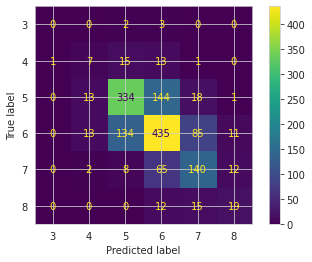

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)
pass

**Случайный лес (Random Forest).**

In [ ]:
from sklearn import ensemble


random_forest = ensemble.RandomForestClassifier(n_estimators=130)
random_forest.fit(X_train,y_train)

train_err = np.mean(y_train!=random_forest.predict(X_train))
test_err = np.mean(y_test!=random_forest.predict(X_test))


table.loc['Random Forest', :] = (train_err, test_err)
table

,train,test
kNN,1,0.397374
Random Forest,0.0,0.300732


Данный метод смог немного улучшить результат.

**SVC**

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

train_err1 = np.mean(y_train != svc.predict(X_train))
test_err1  = np.mean(y_test  != svc.predict(X_test))

table.loc['SVC', :] = (train_err1, test_err1)
table

,train,test
kNN,1,0.397374
Random Forest,0.0,0.300732
SVC,0.382738,0.40652


Результат оказался примерно таким же как и у kNN.

**Extremely Randomized Trees**

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

train_err2 = np.mean(y_train != ert.predict(X_train))
test_err2  = np.mean(y_test  != ert.predict(X_test))

table.loc['Extremely Randomized Trees', :] = (train_err2, test_err2)
table

,train,test
kNN,1,0.397374
Random Forest,0.0,0.300732
SVC,0.382738,0.40652
Extremely Randomized Trees,0.0,0.305389


Результат примерно тот же, что и у Случайного леса.

Итог всех методов можно увидеть ниже:

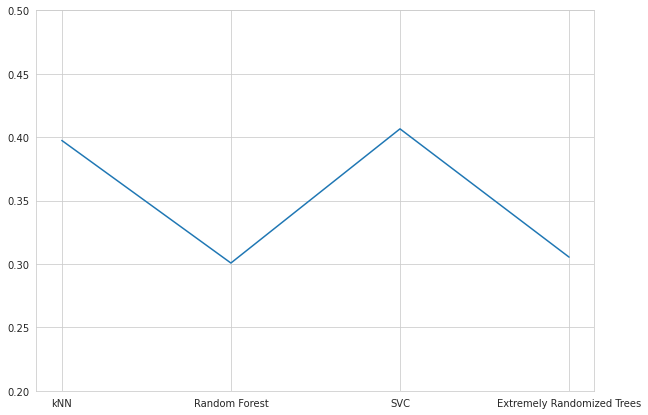

In [ ]:
Names=["kNN", "Random Forest", "SVC", "Extremely Randomized Trees"]
Errors=[best_cv_err, test_err, test_err1, test_err2]
    
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.lineplot(x = Names, y = Errors)
plt.ylim([0.2,0.5])
pass

В итоге лучшим оказались методы Random Forest и Extremely Randomized Trees.

 **Логистическая регрессия**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

table = pd.DataFrame(columns=('train', 'test'))
table.loc['LogisticRegression', :] = (err_train, err_test)
table


train confusion matrix:
[[   0    0    3    7    0    0    0]
 [   0    0   97   54    2    0    0]
 [   0    0  919  564    0    0    0]
 [   0    0  463 1454   49    0    0]
 [   0    0   62  613   87    0    0]
 [   0    0   10  103   16    0    0]
 [   0    0    0    2    2    0    0]]

test confusion matrix:
[[  0   0   3   2   0   0]
 [  0   0  26  11   0   0]
 [  0   0 313 196   1   0]
 [  0   0 171 488  19   0]
 [  0   0  16 191  20   0]
 [  0   0   5  31  10   0]]



,train,test
LogisticRegression,0.454182,0.453759


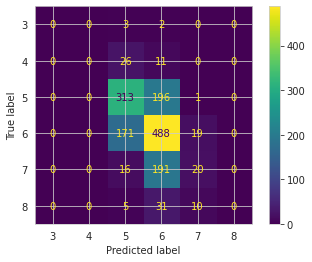

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
pass

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

table.loc['RandomForest', :] = (err_train, err_test)
table

train confusion matrix:
[[  10    0    0    0    0    0    0]
 [   0  153    0    0    0    0    0]
 [   0    0 1483    0    0    0    0]
 [   0    0    0 1966    0    0    0]
 [   0    0    0    0  762    0    0]
 [   0    0    0    0    0  129    0]
 [   0    0    0    0    0    0    4]]

test confusion matrix:
[[  0   0   3   2   0   0]
 [  1   5  22   8   1   0]
 [  0   2 375 130   3   0]
 [  0   0 109 538  30   1]
 [  0   0   2  94 130   1]
 [  0   0   0  16  14  16]]



,train,test
LogisticRegression,0.454182,0.453759
RandomForest,0.0,0.292083


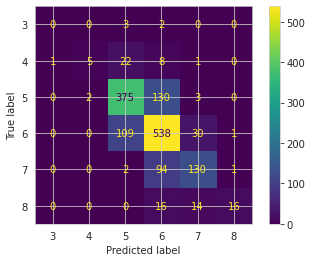

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
pass

# Нейронная сеть

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42)
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30,), random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.4049256711781673, 0.4291417165668663)

In [ ]:
alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err.index(min(test_err))]

table = pd.DataFrame(columns=('opt', 'error'))
table.loc['alpha', :] = (alpha_opt, min_test_err)
table

,opt,error
alpha,1.0,0.42515


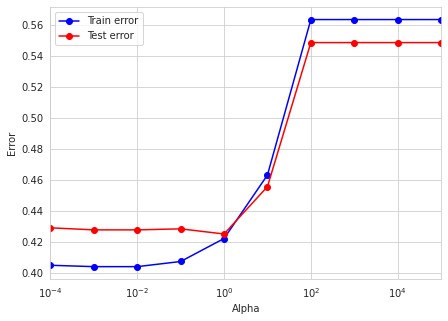

In [ ]:
plt.figure(figsize=(7,5))
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'Train error')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'Test error')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])

plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

In [ ]:
neurons = np.arange(1, 221, 20)
test_err = []
train_err = []
for n in neurons:
    mlp_model = MLPClassifier(hidden_layer_sizes = (n,), random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
neur_err = min(test_err)
neur_opt = neurons[test_err.index(neur_err)]

table.loc['neurons', :] = (neur_opt, neur_err)
table

,opt,error
alpha,1.0,0.42515
neurons,181,0.401863


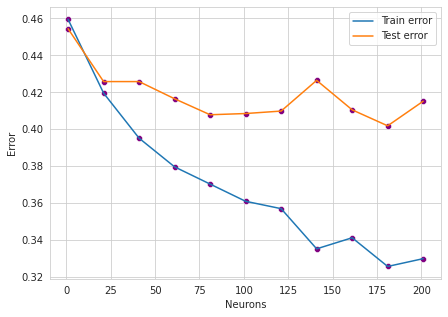

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=neurons,y=train_err,color='purple')
sns.lineplot(x=neurons,y=train_err,label = 'Train error')

sns.scatterplot(x=neurons,y=test_err,color='purple')
sns.lineplot(x=neurons,y=test_err,label = 'Test error')

plt.xlabel('Neurons')
plt.ylabel('Error')
plt.legend()
pass

## Вывод

В результате исследования датасета лучший результат показал метод RandomForest. Неглубокая сеть показала средние результаты.
